In [1]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']


os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
import src.visualization.webvisualization.visualization as vs
import src.data.dimensionality_reduction.HCF.preprocessing as pp
from src.data.labeler.labeler import anomaly_segmenter

import matplotlib.pyplot as plt
plt.style.use('ggplot')

## load in df_data

False    1781
True      261
Name: label, dtype: int64


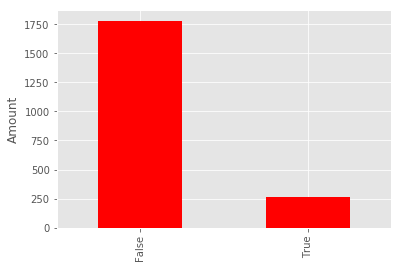

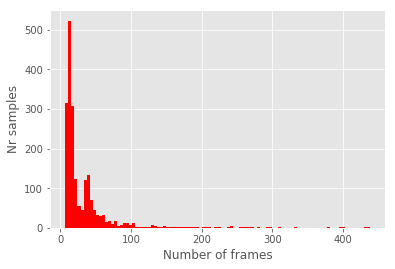

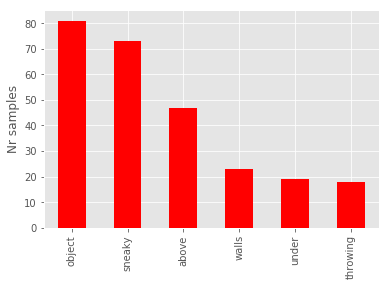

In [2]:
path       = './data/raw/configured_raw/'

list_names = os.listdir(path)
GD         =  pp.get_df(path)
df         =  GD.get_df_data(list_names)

show_dist  =  vs.get_df_vs()
show_dist.plot_label_dist(df)       
show_dist.plot_count_frames(df)       
show_dist.plot_segmentation(df)   

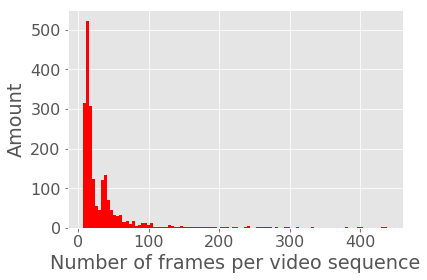

In [3]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})


fig = plt.figure(figsize=(6, 4))

df = df[df['countFrames']< 500]
plt.hist(df['countFrames'], color='r', bins=100)
plt.xlabel('Number of frames per video sequence')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.savefig('./plots/introduction/count_frames.png',bbox_inches="tight")
plt.show()

In [4]:
df_tmp = df
print(len(df_tmp))
print(len(df_tmp[df_tmp['countFrames'] <= 100]))
print(len(df_tmp[df_tmp['label']==True]))
print(len(df_tmp[df_tmp['label']==False]))

2032
1928
254
1778


In [9]:
lol = df[df['location'] == 'hallway']
print(len(lol))
print(len(lol[lol['label'] == False]))

653
586


In [ ]:
df_true = df[df['label'] == True]
df_true.groupby(['location', 'segmentation'])['location'].count().unstack('segmentation').plot(kind='bar', stacked=True)
df_true.groupby(['location', 'segmentation'])['segmentation'].count().unstack('location').plot(kind='bar', stacked=True)

In [ ]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(16, 4))
df_true.groupby(['location', 'segmentation'])['segmentation'].count().unstack('location').plot(kind='bar',rot=45 ,stacked=True)
plt.ylabel('Amount')
plt.savefig('segmentation.PNG',bbox_inches="tight")

#### play videos

In [ ]:
bgs_vs = vs.bgs_vs()
bgs_vs.play_videos(df)

## functions BSG

#### stats

In [ ]:
bgs_vs = vs.bgs_vs()

#### reconstruct

In [ ]:
bgs_vs.show_reconstructed_pic(df,2,5)

#### show proces

In [ ]:
bgs_vs.show_process(list_names[0],10)

### peak derivation

In [ ]:
dict_pg = {
    'resolution'     : 10,
    'area'           : 200,
    'min_h'          : 0,
    'max_h'          : 120,
    
    'max_p_h'        : 4,
    
    'path_save'      :'data/peak_detection/UP/'
    
}


pg_vs = vs.path_gen_vs(df,dict_pg)

In [ ]:
pg_vs.play_videos(0)

### labeler

In [ ]:
path = './data/raw/configured_raw/'

# add_segmentation(path).main()


list_names = os.listdir(path)

lab = anomaly_segmenter(path,list_names)
lab.play_videos()

In [ ]:
import signal
signal.SIGKILL